### EDAV over the audio features 

**Import required packages**

In [1]:
import re,os,sys
import numpy as np
import pandas as pd
import librosa, math
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile
from scipy import signal
from sklearn.preprocessing import normalize

**Exploring data directory**

In [2]:
[x[0] for x in os.walk("data")]

['data',
 'data/genres_original',
 'data/genres_original/pop',
 'data/genres_original/metal',
 'data/genres_original/disco',
 'data/genres_original/blues',
 'data/genres_original/reggae',
 'data/genres_original/classical',
 'data/genres_original/rock',
 'data/genres_original/hiphop',
 'data/genres_original/country',
 'data/genres_original/jazz',
 'data/images_original',
 'data/images_original/pop',
 'data/images_original/metal',
 'data/images_original/disco',
 'data/images_original/blues',
 'data/images_original/reggae',
 'data/images_original/classical',
 'data/images_original/rock',
 'data/images_original/hiphop',
 'data/images_original/country',
 'data/images_original/jazz']

**Get the different genres present within the data directory**

In [3]:
genre_list = []
for dir_name in os.listdir("data/genres_original"):
    if os.path.isdir(os.path.join("data/genres_original",dir_name)):
           genre_list.append(dir_name)          
print(genre_list)

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


### Audio Feature Analysis for POP genre

In [4]:
pop_genre_data = []
for i in os.walk("data/genres_original/pop/"):
    pop_genre_data.append(i)
pop_genre_data = pop_genre_data[0][2]
print(pop_genre_data)

['pop.00027.wav', 'pop.00033.wav', 'pop.00032.wav', 'pop.00026.wav', 'pop.00030.wav', 'pop.00024.wav', 'pop.00018.wav', 'pop.00019.wav', 'pop.00025.wav', 'pop.00031.wav', 'pop.00009.wav', 'pop.00035.wav', 'pop.00021.wav', 'pop.00020.wav', 'pop.00034.wav', 'pop.00008.wav', 'pop.00022.wav', 'pop.00036.wav', 'pop.00037.wav', 'pop.00023.wav', 'pop.00044.wav', 'pop.00050.wav', 'pop.00078.wav', 'pop.00087.wav', 'pop.00093.wav', 'pop.00092.wav', 'pop.00086.wav', 'pop.00079.wav', 'pop.00051.wav', 'pop.00045.wav', 'pop.00053.wav', 'pop.00047.wav', 'pop.00090.wav', 'pop.00084.wav', 'pop.00085.wav', 'pop.00091.wav', 'pop.00046.wav', 'pop.00052.wav', 'pop.00056.wav', 'pop.00042.wav', 'pop.00095.wav', 'pop.00081.wav', 'pop.00080.wav', 'pop.00094.wav', 'pop.00043.wav', 'pop.00057.wav', 'pop.00069.wav', 'pop.00041.wav', 'pop.00055.wav', 'pop.00082.wav', 'pop.00096.wav', 'pop.00097.wav', 'pop.00083.wav', 'pop.00054.wav', 'pop.00040.wav', 'pop.00068.wav', 'pop.00065.wav', 'pop.00071.wav', 'pop.00059.wa

**Read the Audio File and play it**

In [5]:
sample_rate,audio = wavfile.read("data/genres_original/pop/"+"pop.00027.wav")
Audio(audio,rate=sample_rate)  ###plays audio, run locally

In [6]:
###print audio shape
print(audio.shape)

(661504,)


In [7]:
##total time of the clip
duration_of_clip = len(audio)/sample_rate  
print(duration_of_clip)

30.00018140589569


In [8]:
###convert audio to numpy array for processing
audio = audio.astype("float32")

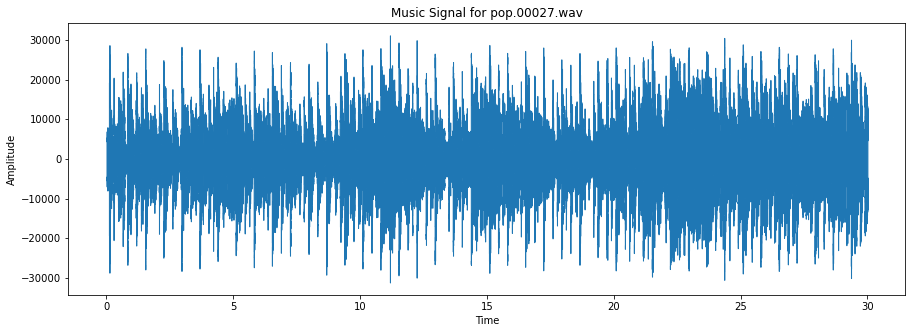

In [10]:
###Plot Amplitude vs time waveform
plt.figure(figsize=(15,5))
librosa.display.waveshow(audio,sr=sample_rate)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Music Signal for pop.00027.wav")
plt.show()

*Get the tempo and the beats of the audio.wav, which will also be plotted as BPM in the EDA*

In [11]:
tempo,beats = librosa.beat.beat_track(y=audio, sr=sample_rate)
print("Tempo : ", tempo)
print("Beats : ", beats)

Tempo :  83.35433467741936
Beats :  [   6   36   67   98  128  159  190  221  251  282  313  343  374  405
  436  467  497  528  558  589  620  651  682  712  743  773  804  835
  866  897  927  958  989 1020 1050 1081 1112 1142 1173 1204]


In [12]:
beat_time = librosa.frames_to_time(beats,sr=sample_rate)
print("Beat Times :",beat_time)

Beat Times : [ 0.13931973  0.83591837  1.55573696  2.27555556  2.9721542   3.69197279
  4.41179138  5.13160998  5.82820862  6.54802721  7.2678458   7.96444444
  8.68426304  9.40408163 10.12390023 10.84371882 11.54031746 12.26013605
 12.95673469 13.67655329 14.39637188 15.11619048 15.83600907 16.53260771
 17.2524263  17.94902494 18.66884354 19.38866213 20.10848073 20.82829932
 21.52489796 22.24471655 22.96453515 23.68435374 24.38095238 25.10077098
 25.82058957 26.51718821 27.2370068  27.9568254 ]


rms = librosa.feature.rms(audio)
t = librosa.times_like(rms)
plt.semilogy(t,rms[0],label='RMS');
plt.xlabel('Frame')
plt.ylabel('RMS')
plt.legend(loc='lower right')
plt.title('RMS Energy');

*The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below* 

##### cite : https://librosa.org/doc/main/generated/librosa.feature.spectral_rolloff.html

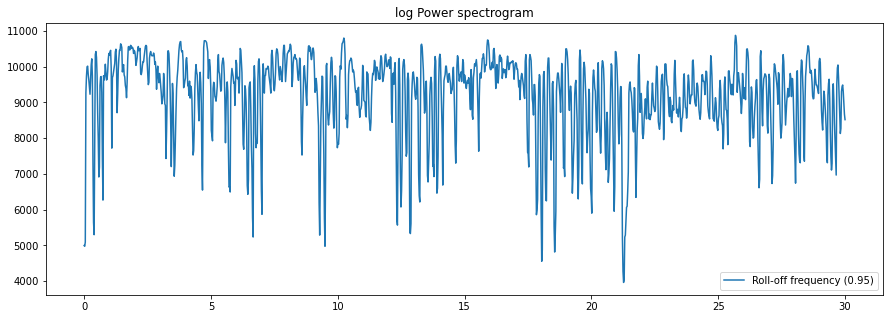

In [20]:
rolloff = librosa.feature.spectral_rolloff(y=audio,sr=sample_rate, roll_percent=0.95)
plt.figure(figsize=(10,6))
plt.plot(librosa.times_like(rolloff),rolloff[0],label='Roll-off frequency (0.95)')
plt.legend(loc='lower right')
plt.title('log Power spectrogram');

*Compute the spectral centroid.
Each frame of a magnitude spectrogram is normalized and treated as a distribution over frequency bins, from which the mean (centroid) is extracted per frame.*  

***cite:https://librosa.org/doc/main/generated/librosa.feature.spectral_centroid.html***

/var/folders/hk/fpn69pcx6jq8n7glwbj2pbp40000gn/T/ipykernel_64201/1810403194.py:1: FutureWarning: Pass y=[ 1131.  1578.  2107. ... -2279. -4733. -6299.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroid = librosa.feature.spectral_centroid(audio,sr=sample_rate);


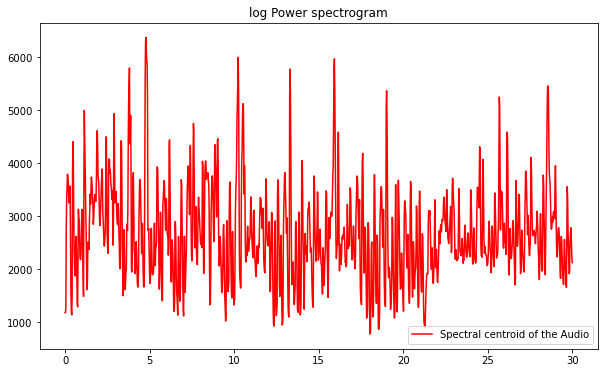

In [46]:
centroid = librosa.feature.spectral_centroid(audio,sr=sample_rate);
t_centroid = librosa.times_like(centroid)
plt.figure(figsize=(10,6))
plt.plot(t_centroid, centroid.T, label='Spectral centroid of the Audio', color='r')
plt.legend(loc='lower right')
plt.title('log Power spectrogram');

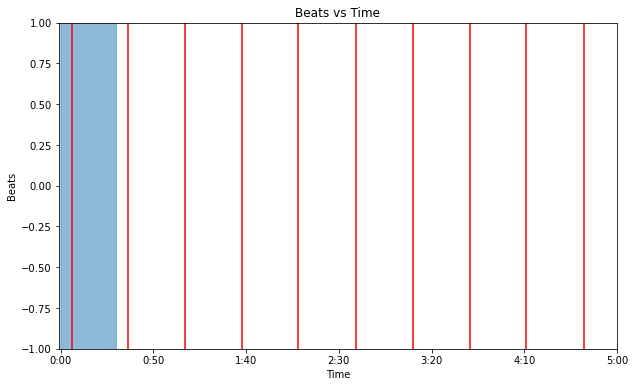

In [47]:
###Plot Beats 
plt.figure(figsize=(10,6))
librosa.display.waveshow(audio,alpha=0.5)
plt.vlines(beats,-1,1,color='red')
plt.ylim(-1,1)
plt.xlim(-1,300)
plt.xlabel('Time')
plt.ylabel('Beats')
plt.title("Beats vs Time")
plt.show()

In [48]:
### constructing a  click track

In [49]:
clicks = librosa.clicks(beats,sr=sample_rate,length=len(audio))
Audio(audio + clicks,rate=sample_rate)

/var/folders/hk/fpn69pcx6jq8n7glwbj2pbp40000gn/T/ipykernel_64201/1184545046.py:1: FutureWarning: Pass times=[   6   36   67   98  128  159  190  221  251  282  313  343  374  405
  436  467  497  528  558  589  620  651  682  712  743  773  804  835
  866  897  927  958  989 1020 1050 1081 1112 1142 1173 1204] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  clicks = librosa.clicks(beats,sr=sample_rate,length=len(audio))


**Taking STFT over the audio signals to determine the Chroma. Chroma is a type of transformation of audio signals into the numerical values**

In [50]:
hop = 512

In [51]:
audio_stft = librosa.stft(audio,hop_length=hop)
chroma = librosa.feature.chroma_stft(S=np.abs(audio_stft)**2,sr=sample_rate)
print("Numerical Values (Chroma of the full audio) :")
print(chroma)
print("\n")
print("Chroma Shape: ", chroma.shape)
print("-----------------------------------------------------------------------")
chroma_sum = np.cumsum(chroma)
print("Cummulative Sum for Chroma : ", chroma_sum)

Numerical Values (Chroma of the full audio) :
[[0.6404946  0.4626495  0.39868948 ... 0.5064574  0.38350084 0.4857164 ]
 [0.20052096 0.07773449 0.06108193 ... 0.33506534 0.32565308 0.47145554]
 [0.12428872 0.06032043 0.05560489 ... 0.6006518  0.7004351  0.72841865]
 ...
 [0.3590587  0.22666895 0.22085461 ... 0.64535564 0.8526323  1.        ]
 [0.5894453  0.42031097 0.42630544 ... 0.38552782 0.49983898 0.6887935 ]
 [1.         1.         1.         ... 0.74715024 0.7847876  0.770416  ]]


Chroma Shape:  (12, 1293)
-----------------------------------------------------------------------
Cummulative Sum for Chroma :  [6.4049459e-01 1.1031440e+00 1.5018336e+00 ... 5.8574775e+03 5.8582622e+03
 5.8590327e+03]


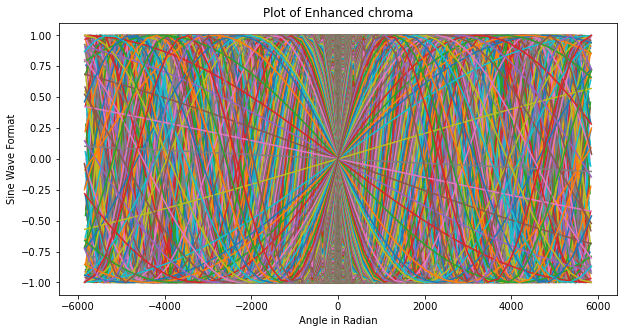

In [52]:
x = np.linspace(-chroma_sum, chroma_sum)
y = np.sin(np.linspace(-chroma_sum, chroma_sum))
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xlabel('Angle in Radian')
plt.ylabel('Sine Wave Format')
plt.title('Plot of Enhanced chroma')
plt.show()

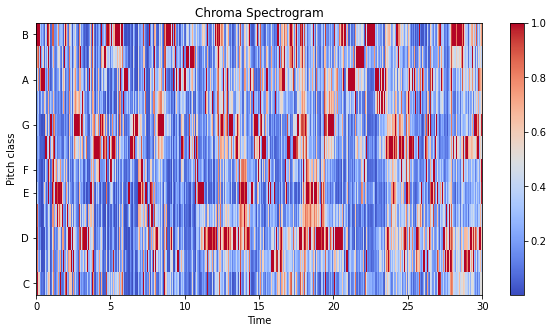

In [53]:
plt.figure(figsize=(10,5))
librosa.display.specshow(chroma,x_axis='time',y_axis='chroma',hop_length=hop,cmap='coolwarm');
plt.title('Chroma Spectrogram')
plt.colorbar();

**Convert to decibels to display the spectogram**

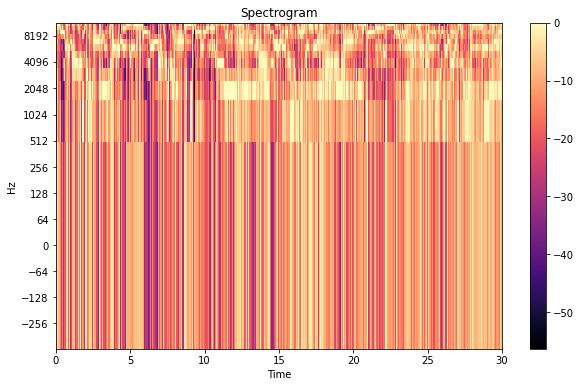

In [54]:
audio_db  = librosa.amplitude_to_db(chroma, ref = np.max)
plt.figure(figsize=(10,6))
librosa.display.specshow(audio_db,sr=sample_rate,hop_length=hop,x_axis="time",y_axis='log')
plt.title('Spectrogram')
plt.colorbar();

/var/folders/hk/fpn69pcx6jq8n7glwbj2pbp40000gn/T/ipykernel_64201/2576485762.py:2: FutureWarning: Pass y=[ 1131.  1578.  2107. ... -2279. -4733. -6299.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_features = librosa.feature.melspectrogram(audio,sr=sample_rate)


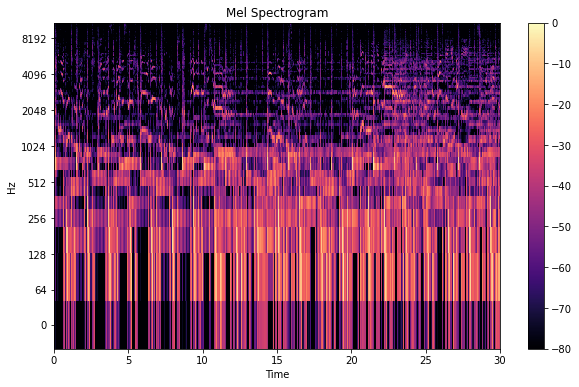

In [55]:
plt.figure(figsize=(10,6))
mel_features = librosa.feature.melspectrogram(audio,sr=sample_rate)
mel_db = librosa.amplitude_to_db(mel_features, ref = np.max)
librosa.display.specshow(mel_db,sr=sample_rate,hop_length=hop,x_axis="time",y_axis='log')
plt.title('Mel Spectrogram')
plt.colorbar();

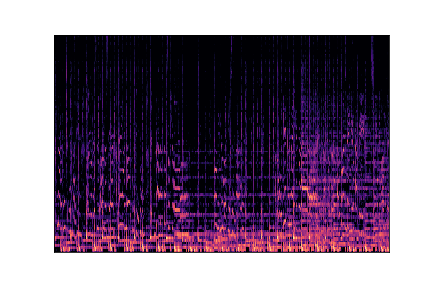

In [59]:
from IPython.display import Image 
pil_img = Image(filename="data/images_original/pop/pop00027.png")
display(pil_img)

Mean of the MFCC 53.166943
Variance of the MFCC: 42709.055


/var/folders/hk/fpn69pcx6jq8n7glwbj2pbp40000gn/T/ipykernel_64201/2390896099.py:1: FutureWarning: Pass y=[ 1131.  1578.  2107. ... -2279. -4733. -6299.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio,sr=sample_rate);


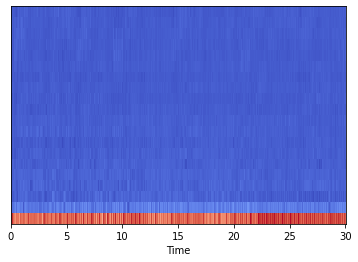

In [60]:
mfcc = librosa.feature.mfcc(audio,sr=sample_rate);
librosa.display.specshow(mfcc,sr=sample_rate,x_axis='time');
print('Mean of the MFCC',mfcc.mean());
print('Variance of the MFCC:',mfcc.var());

In [61]:
zero_cross = librosa.zero_crossings(audio,pad=False)
zero_cross_rate = librosa.feature.zero_crossing_rate(audio)
print("Zero Cross Rate Shape:", zero_cross.shape)
print("Total Zero Crossings :", sum(zero_cross))
print("Zero Cross Rate Shape:", zero_cross_rate.shape)

Zero Cross Rate Shape: (661504,)
Total Zero Crossings : 67487
Zero Cross Rate Shape: (1, 1293)


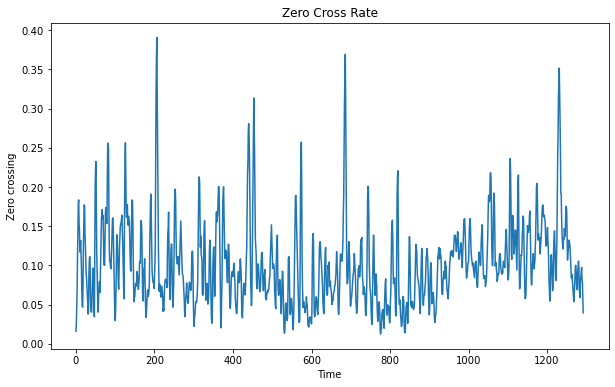

In [62]:
plt.figure(figsize=(10,6));
plt.plot(zero_cross_rate[0]);
plt.xlabel('Time')
plt.ylabel('Zero crossing')
plt.title('Zero Cross Rate')
plt.show()

### Wave = Wave(harmonic) + Wave(percussive)

In [63]:
harmonic, percussive  = librosa.effects.hpss(audio)

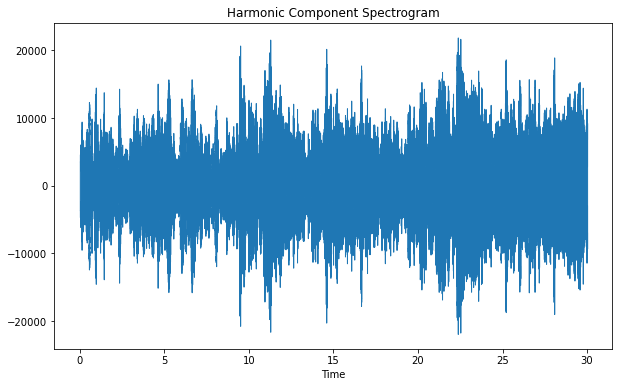

In [64]:
plt.figure(figsize=(10,6))
librosa.display.waveshow(harmonic,sr=sample_rate)
plt.title('Harmonic Component Spectrogram');

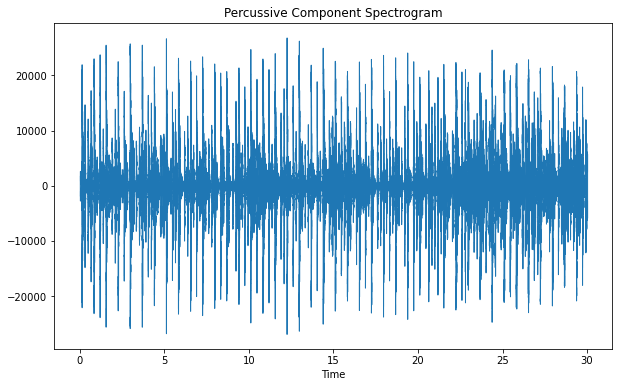

In [65]:
plt.figure(figsize=(10,6));
librosa.display.waveshow(percussive,sr=sample_rate);
plt.title('Percussive Component Spectrogram');

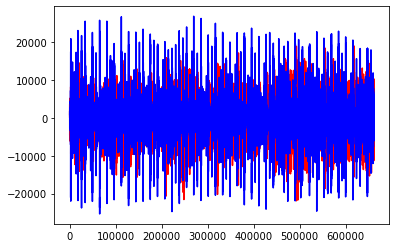

In [66]:
plt.plot(harmonic, color = 'red');
plt.plot(percussive, color = 'blue');